In [3]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# computer vision library
import cv2

# glob
from glob import glob

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# extract path of male and female in crop_data folder and put them in a list
happypath = glob('./FEA_crop_data/happy/*.jpg')
sadpath = glob('./FEA_crop_data/sad/*.jpg')
angrypath = glob('./FEA_crop_data/angry/*.jpg')
#confusedpath = glob('./crop_data/confused/*.jpg'

In [9]:
print('The number of images in happy folder = ',len(happypath))
print('The number of images in sad folder = ',len(sadpath))
print('The number of images in angry folder = ',len(angrypath))

The number of images in happy folder =  629
The number of images in sad folder =  265
The number of images in angry folder =  446


In [6]:
df_happy = pd.DataFrame(happypath,columns=['filepath'])
df_happy['expression'] = 'happy'

df_sad = pd.DataFrame(sadpath,columns=['filepath'])
df_sad['expression'] = 'sad'

df_angry = pd.DataFrame(angrypath,columns=['filepath'])
df_angry['expression'] = 'angry'

#df_confused = pd.DataFrame(confusedpath,columns=['filepath'])
#df_confused['expression'] = 'confused'

df = pd.concat((df_happy,df_sad, df_angry),axis=0)

df.head()

,filepath,expression
0,./FEA_crop_data/happy\happy_0.jpg,happy
1,./FEA_crop_data/happy\happy_1.jpg,happy
2,./FEA_crop_data/happy\happy_100.jpg,happy
3,./FEA_crop_data/happy\happy_1000.jpg,happy
4,./FEA_crop_data/happy\happy_1002.jpg,happy


In [7]:
df.tail()

,filepath,expression
441,./FEA_crop_data/angry\angry_9.jpg,angry
442,./FEA_crop_data/angry\angry_90.jpg,angry
443,./FEA_crop_data/angry\angry_94.jpg,angry
444,./FEA_crop_data/angry\angry_97.jpg,angry
445,./FEA_crop_data/angry\angry_98.jpg,angry


In [8]:
df.shape

(1340, 2)

In [10]:
# it will take each image path
# then return width of the image
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [11]:
df['dimension'] = df['filepath'].apply(get_size) # store dimension of image in this columns

In [12]:
df.head()

,filepath,expression,dimension
0,./FEA_crop_data/happy\happy_0.jpg,happy,1384
1,./FEA_crop_data/happy\happy_1.jpg,happy,615
2,./FEA_crop_data/happy\happy_100.jpg,happy,273
3,./FEA_crop_data/happy\happy_1000.jpg,happy,122
4,./FEA_crop_data/happy\happy_1002.jpg,happy,273


In [13]:
dist_expression = df['expression'].value_counts()
dist_expression

expression
happy    629
angry    446
sad      265
Name: count, dtype: int64

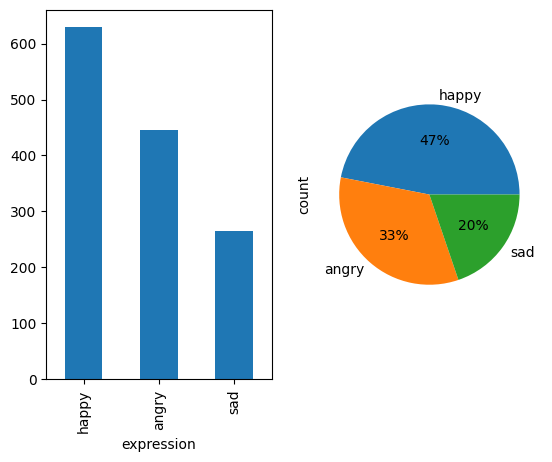

In [14]:
fig,ax = plt.subplots(nrows=1,ncols=2)
dist_expression.plot(kind='bar',ax=ax[0])
dist_expression.plot(kind='pie',ax=ax[1],autopct='%0.0f%%')
plt.show()

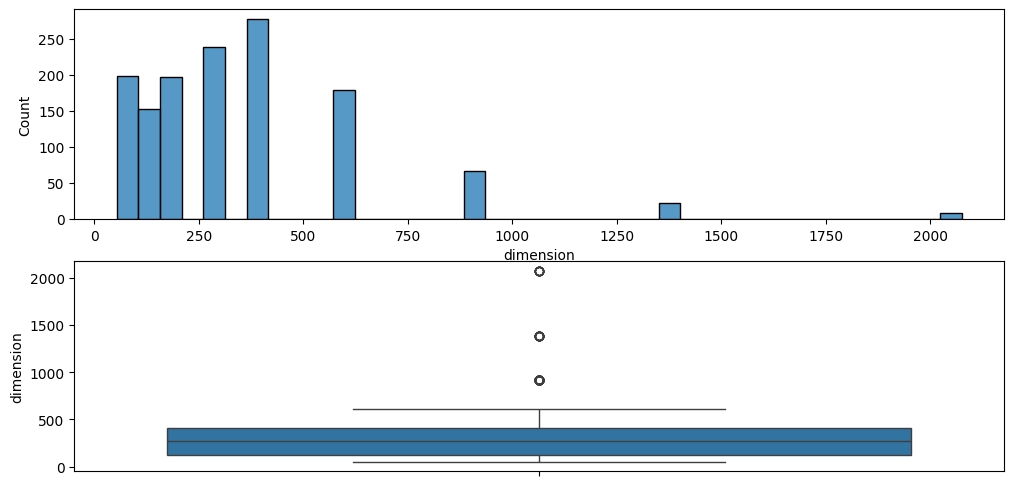

In [15]:
# What Distribution of size of all Images
# Histogram
# Box Plot
# Split by “Gender”
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,2)
sns.boxplot(df['dimension'])
plt.show()

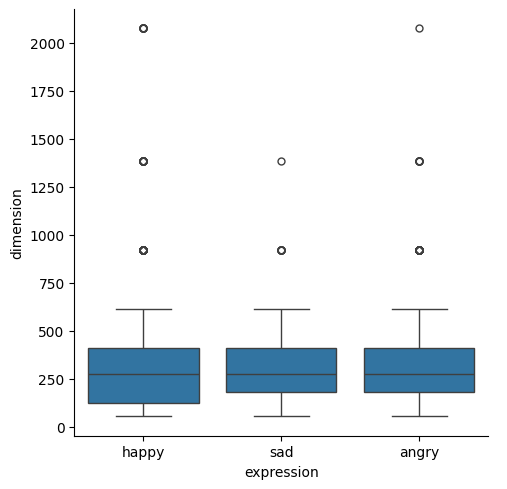

In [16]:
sns.catplot(data=df,x='expression',y='dimension',kind='box')

In [20]:
df_filter = df.query('dimension > 60')
df_filter.shape

(1246, 3)

In [21]:
df_filter['expression'].value_counts(normalize=True)

expression
happy    0.460674
angry    0.345907
sad      0.193419
Name: proportion, dtype: float64

In [22]:
df_filter.head()

,filepath,expression,dimension
0,./FEA_crop_data/happy\happy_0.jpg,happy,1384
1,./FEA_crop_data/happy\happy_1.jpg,happy,615
2,./FEA_crop_data/happy\happy_100.jpg,happy,273
3,./FEA_crop_data/happy\happy_1000.jpg,happy,122
4,./FEA_crop_data/happy\happy_1002.jpg,happy,273


#### Structure the image 
- 100 x 100

In [23]:
def structuring(path):
    try:

        # step - 1: read image
        img = cv2.imread(path) # BGR
        # step - 2: convert into grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # step -3: resize into 100 x 100 array   

        size = gray.shape[0]
        if size >= 100:
            # cv2.INTER_AREA (SHINK)
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_AREA)
        else:
            # cv2.INTER_CUBIC (ENLARGE)
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_CUBIC)

        # step -4: Flatten Image (1x10,000)
        flatten_image = gray_resize.flatten()
        return flatten_image
    
    except:
        return None

In [24]:
df_filter['data'] = df_filter['filepath'].apply(structuring) # convert all images into 100 x 100
df_filter.head()

,filepath,expression,dimension,data
0,./FEA_crop_data/happy\happy_0.jpg,happy,1384,"[8, 20, 22, 11, 67, 49, 44, 57, 79, 56, 54, 48..."
1,./FEA_crop_data/happy\happy_1.jpg,happy,615,"[145, 144, 145, 143, 143, 141, 133, 124, 67, 4..."
2,./FEA_crop_data/happy\happy_100.jpg,happy,273,"[26, 6, 14, 11, 14, 12, 19, 20, 19, 32, 40, 48..."
3,./FEA_crop_data/happy\happy_1000.jpg,happy,122,"[109, 113, 114, 113, 111, 110, 102, 81, 55, 53..."
4,./FEA_crop_data/happy\happy_1002.jpg,happy,273,"[17, 13, 17, 22, 32, 33, 33, 22, 9, 4, 4, 3, 5..."


In [25]:
data = df_filter['data'].apply(pd.Series)
data.columns = [f"pixel_{i}" for i in data.columns]
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,8,20,22,11,67,49,44,57,79,56,...,173,165,158,149,144,154,161,152,148,148
1,145,144,145,143,143,141,133,124,67,42,...,23,6,5,6,10,19,28,19,20,22
2,26,6,14,11,14,12,19,20,19,32,...,210,211,212,212,212,213,210,211,210,206
3,109,113,114,113,111,110,102,81,55,53,...,88,59,46,48,51,49,51,47,46,46
4,17,13,17,22,32,33,33,22,9,4,...,163,160,158,143,146,146,143,140,144,109


#### Data Normalization

In [26]:
# since for 8 bit image max value is 255 
# therefore we are dividing each and every pixel with 255
data = data/255.0 
data['expression'] = df_filter['expression']
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,expression
0,0.031373,0.078431,0.086275,0.043137,0.262745,0.192157,0.172549,0.223529,0.309804,0.219608,...,0.647059,0.619608,0.584314,0.564706,0.603922,0.631373,0.596078,0.580392,0.580392,happy
1,0.568627,0.564706,0.568627,0.560784,0.560784,0.552941,0.521569,0.486275,0.262745,0.164706,...,0.023529,0.019608,0.023529,0.039216,0.074510,0.109804,0.074510,0.078431,0.086275,happy
2,0.101961,0.023529,0.054902,0.043137,0.054902,0.047059,0.074510,0.078431,0.074510,0.125490,...,0.827451,0.831373,0.831373,0.831373,0.835294,0.823529,0.827451,0.823529,0.807843,happy
3,0.427451,0.443137,0.447059,0.443137,0.435294,0.431373,0.400000,0.317647,0.215686,0.207843,...,0.231373,0.180392,0.188235,0.200000,0.192157,0.200000,0.184314,0.180392,0.180392,happy
4,0.066667,0.050980,0.066667,0.086275,0.125490,0.129412,0.129412,0.086275,0.035294,0.015686,...,0.627451,0.619608,0.560784,0.572549,0.572549,0.560784,0.549020,0.564706,0.427451,happy


In [27]:
###
data.isnull().sum().sum()

0

In [28]:
## remove the missing values
data.dropna(inplace=True)

In [29]:
data.shape

(1246, 10001)

**Save the data** for future study

In [30]:
import pickle

In [27]:
pickle.dump(data,open('./FEA_data/expression_data_images_100_100.pickle',mode='wb'))

---
### END